In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
#download csv: https://benjaminbenben.com/lastfm-to-csv/
df = pd.read_csv('~/Documentos/MEGA/gabrielhdez41.csv')

In [4]:
#df[df.isnull().any(axis=1)].head(50)
df.head()

,artist,album,track,date
0,Kendrick Lamar,good kid m.A.A.d city (Deluxe),Compton,20 Aug 2021 01:26
1,Kendrick Lamar,good kid m.A.A.d city (Deluxe),Real,20 Aug 2021 01:19
2,Kendrick Lamar,good kid m.A.A.d city (Deluxe),Sing About Me I'm Dying of Thirst,20 Aug 2021 01:06
3,Kendrick Lamar,good kid m.A.A.d city (Deluxe),Swimming Pools (Drank) (extended version),20 Aug 2021 01:01
4,Kendrick Lamar,good kid m.A.A.d city (Deluxe),m.A.A.d city,20 Aug 2021 00:55


In [5]:
df['date'] = pd.to_datetime(df['date'], format='%d %b %Y %H:%M')

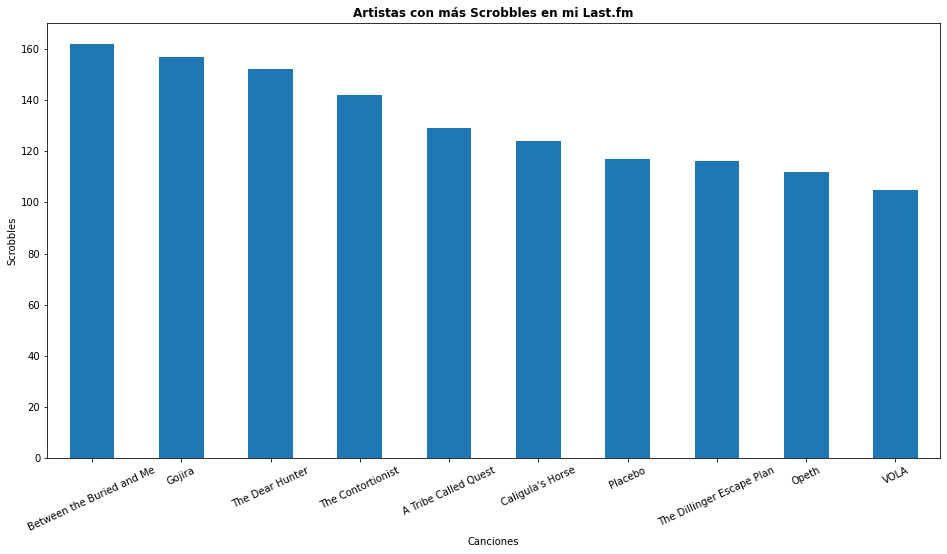

In [6]:
plt.figure(figsize=(16,8))
filt = (df['date'] >= pd.to_datetime('2021'))
df.loc[filt].groupby('artist')['artist'].count().sort_values(ascending=False).head(10).plot.bar()
plt.title('Artistas con más Scrobbles en mi Last.fm', fontweight='bold')
plt.xlabel('Canciones')
plt.ylabel('Scrobbles')
plt.xticks(rotation=25)

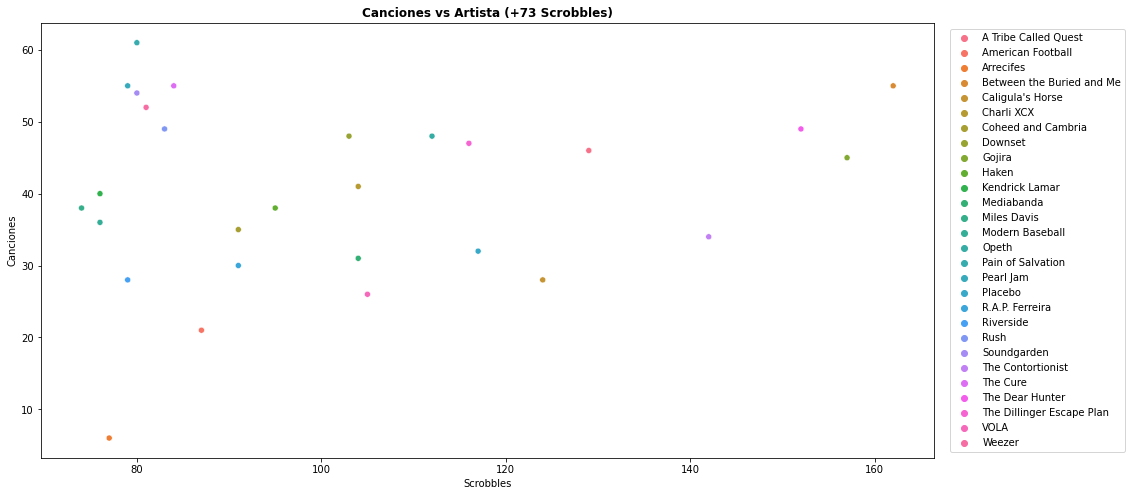

In [7]:
plt.figure(figsize=(16,8))
filt = (df['date'] >= pd.to_datetime('2021'))
x = df.loc[filt].groupby('artist').filter(lambda x: len(x) > 73).groupby('artist')['track'].count().sort_values(ascending=False)
y = df.loc[filt].groupby('artist').filter(lambda x: len(x) > 73).groupby('artist')['track'].nunique().sort_values(ascending=False)
hue = df.loc[filt].groupby('artist').filter(lambda x: len(x) > 73).groupby('artist')['artist'].first().sort_values(ascending=False)
sns.scatterplot(x=x, y=y, hue=hue).legend(loc='center right', bbox_to_anchor=(1.22, 0.5), ncol=1)
plt.title('Canciones vs Artista (+73 Scrobbles)', fontweight='bold')
plt.xlabel('Scrobbles')
plt.ylabel('Canciones')

In [8]:
df1 = df.groupby(pd.Grouper(freq='W', key='date'))['track'].count()

Text(0, 0.5, 'Scrobbles')

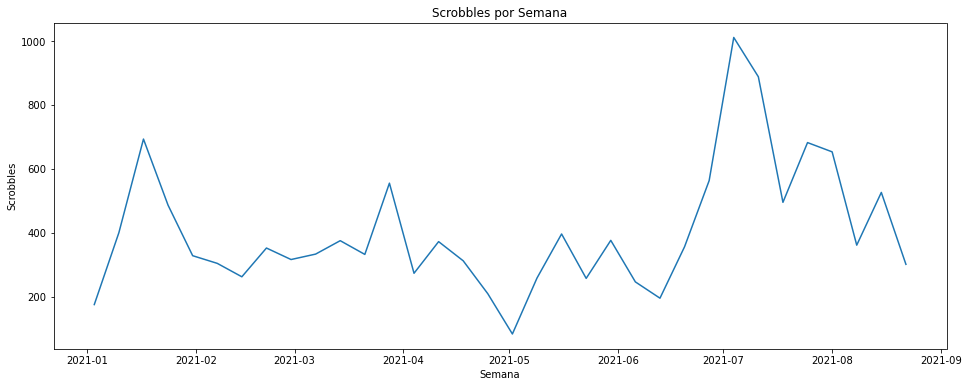

In [10]:
plt.figure(figsize=(16,6))
filt1 = (df['date'] >= pd.to_datetime('2021-01-01'))
df1 = df.loc[filt1].groupby(pd.Grouper(freq='W', key='date'))['track'].count()
sns.lineplot(data=df1)
plt.title('Scrobbles por Semana')
plt.xlabel('Semana')
plt.ylabel('Scrobbles')